In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [153]:
pd.set_option('display.max_rows', None)

In [31]:
def is_not_in(dfs, keys=[str(i) for i in range(2002,2019)]):

    unis = [dfs[i].iloc[:,0].unique() for i in keys]

    not_in = []
    for i in range(len(keys)):
        for j in range(len(keys)):
        
            if i!=j:
            
                not_in.append([i, j, unis[i][[str(o).lower().strip().replace('á','a')
                                              .replace('é','e')
                                              .replace('í','i')
                                              .replace('ó','o')
                                              .replace('ú','u') not in [str(l).lower().strip().replace('á','a')
                                                                         .replace('é','e')
                                                                         .replace('í','i')
                                                                         .replace('ó','o')
                                                                         .replace('ú','u') for l in unis[j].tolist()] for o in unis[i].tolist()]]])

    return not_in
            

In [187]:
energia1 = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\energia.xls', None)

In [188]:
energia1.keys()

dict_keys(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '10 - classes de consumo', 'ESRI_MAPINFO_SHEET'])

In [189]:
keys = list(energia1.keys())[:-2]

# Energy 1:

In [202]:
i=-1

i

-1

##### Tail:
0: 26
...
13: 28
...

In [224]:
i+=1
print(i)
energia1[keys[i]].head(20)


17


IndexError: list index out of range

In [11]:
df0 = energia1[keys[0]].copy()

In [12]:
cols = df0.iloc[4, 0:2].tolist() + df0.iloc[6, 2:].tolist()

In [13]:
cols = [i. replace(' (1)', '') for i in cols]

In [14]:
cols

['Áreas de Planejamento,Regiões de Planejamento, Regiões Administrativas e bairros',
 'Consumo de energia elétrica (MWh)',
 'Residencial',
 'Industrial',
 'Comercial',
 'Rural',
 'Poder público ',
 'Iluminacão pública',
 'Serv.público',
 'Consumo próprio']

In [15]:
same_cols = []

for i in range(len(keys)): 
    for j in range(len(keys)):
        
        if i!=j:
            cols_i = energia1[keys[i]].iloc[4, 0:2].tolist() + energia1[keys[i]].iloc[6, 2:].tolist()
            cols_j = energia1[keys[j]].iloc[4, 0:2].tolist() + energia1[keys[j]].iloc[6, 2:].tolist()
        
            same_cols.append(sum(u!=t for u, t in zip(cols_i, cols_j)))
        

In [16]:
sum(same_cols)

44

In [17]:
same_lentgh = []

for i in range(len(keys)): 
    for j in range(len(keys)):
        
        if i!=j:
            cols_i = len(energia1[keys[i]].columns)
            cols_j = len(energia1[keys[j]].columns)
            
            same_lentgh.append(cols_i != cols_j)
        

In [18]:
sum(same_lentgh)

134

In [19]:
for i in range(len(keys)):
    
    if i < 12:
        energia1[keys[i]] = energia1[keys[i]].head(-26).tail(-8).iloc[:, :10]
        energia1[keys[i]].columns = cols
    
    else:
        energia1[keys[i]] = energia1[keys[i]].head(-28).tail(-8) .iloc[:, :10]
        energia1[keys[i]].columns = cols

In [20]:
i=-1

In [ ]:
i-=1
energia1[keys[i]].tail()

In [23]:
energia1.head()

AttributeError: 'dict' object has no attribute 'head'

# Saving Loading Checkpoint

In [24]:
energia1_copy = energia1.copy()

In [25]:
energia1 = energia1_copy.copy()

## Checking Neighborhoods Names:

##### Column Name

In [26]:
hood_col_name = energia1[keys[0]].columns[0]

In [27]:
hood_col_name

'Áreas de Planejamento,Regiões de Planejamento, Regiões Administrativas e bairros'

In [28]:
col_name_equal = []
for i in range(len(keys)): 
    
    col_name_equal.append(energia1[keys[i]].columns[0] != hood_col_name)  
    
    

In [29]:
sum(col_name_equal)

0

##### Unique Neighborhoods Names:

In [32]:
not_in = is_not_in(energia1)

In [33]:
for key in keys:
    
    energia1[key] = energia1[key][~energia1[key][hood_col_name].isin(not_in[2][2])].copy()
    energia1[key] = energia1[key][~energia1[key][hood_col_name].isin(not_in[48][2])].copy()

In [34]:
energia1[keys[16]][hood_col_name][157] = 'Freguesia'

###  Testing

In [35]:
not_in = is_not_in(energia1)

In [ ]:
not_in

In [ ]:
for i in range(len(keys)): print(len(energia1[keys[i]]))

### Merging Energy 1:

In [38]:

for key in keys:
    
    energia1[key]['Ano'] = [int(key) for i in range(len(energia1[key]))]

    cols = energia1[key].columns.tolist()[:]
    new_cols = [cols[0]] + [cols[-1]] + cols[1:len(cols)-1]

    energia1[key] = energia1[key][new_cols]

In [39]:
energy1 = pd.concat([energia1[key] for key in keys], axis=0)

In [40]:
len(energy1)

3174

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 8 to 223
Data columns (total 11 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Áreas de Planejamento,Regiões de Planejamento, Regiões Administrativas e bairros  3174 non-null   object
 1   Ano                                                                               3174 non-null   int64 
 2   Consumo de energia elétrica (MWh)                                                 3174 non-null   object
 3   Residencial                                                                       3173 non-null   object
 4   Industrial                                                                        3173 non-null   object
 5   Comercial                                                                         3173 non-null   object
 6   Rural    

In [81]:
energy1#.iloc[:, 1:].astype(float).plot('Ano','Residencial')

,"Áreas de Planejamento,Regiões de Planejamento, Regiões Administrativas e bairros",Ano,Consumo de energia elétrica (MWh),Residencial,Industrial,Comercial,Rural,Poder público,Iluminacão pública,Serv.público,Consumo próprio
8,Total,2002,1.37391e+07,4.60319e+06,3.13345e+06,4.27251e+06,2343.64,941905,38902.6,689626,57122.8
9,Área de Planejamento 1,2002,2.0469e+06,186390,230907,1.13101e+06,0,297447,0,154883,46263
10,Região de Planejamento 1.1,2002,2.0469e+06,186390,230907,1.13101e+06,0,297447,0,154883,46263
12,Caju,2002,75960,7793.31,27173.1,32209.3,0,4089.74,0,4690.05,4.474
13,Gamboa,2002,24705.2,4433.09,2043.67,13619.6,0,4607.61,0,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...
218,Sepetiba,2018,53081.2,42848.5,87.268,6432.66,-,2779.68,-,933.087,-
219,Região de Planejamento 5.4,2018,139927,101992,4547.86,23278.2,402.766,8882.16,-,820.898,3.625
221,Barra de Guaratiba,2018,10285.9,5844.96,57.464,2946.69,8.487,1063.91,-,364.408,-
222,Guaratiba,2018,97286.2,69606.8,4384.35,15695.6,390.833,6916.29,-,289.895,2.425


# Saving Loading Table Electric Energy1

In [651]:
#energy1.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia1_clean.csv', index=False)

In [4]:
energy1 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia1_clean.csv')

In [7]:
energy1.shape

(3174, 11)

# Energy 2: 

In [999]:
energia2 = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\energia_unidades.xls', None)

In [ ]:
0: 11
15: 12

In [866]:
i=-1

In [974]:
i+=1
print(i)
energia2[keys[i]].tail(13)


18


IndexError: list index out of range

In [1000]:
df0 = energia2[keys[0]]
cols = df0.iloc[5, :2].tolist() + [df0.iloc[6, 2]] + [df0.iloc[5, 3]]

In [1001]:
cnt=0
for key in keys:
    
    
    
    if cnt < 15:
        energia2[key] = energia2[key].head(-11).tail(-8)
        
        energia2[key].columns = cols
        energia2[key]['Ano'] = [int(key) for i in range(len(energia2[key]))]
        
    else:
        energia2[key] = energia2[key].head(-12).tail(-8)
        
        energia2[key].columns = cols
        energia2[key]['Ano'] = [int(key) for i in range(len(energia2[key]))]
    
    cnt+=1    

In [1002]:
energia2[keys[16]].loc[36, hood_col_name] = 'Botafogo'
energia2[keys[15]].loc[153, hood_col_name] = 'Bancários'


In [1003]:
not_in = is_not_in(energia2)

In [ ]:
not_in

# Combining Tables in Energia 2

In [1006]:
energy2 = pd.concat([energia2[key] for key in keys], axis=0)

In [1008]:
len(energy2)

3672

# Saving Loading Table Electric Energy 2

In [1009]:
#energy2.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia2_clean.csv', index=False)

In [8]:
energy2 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia2_clean.csv')

In [9]:
energy2.shape

(3672, 5)

# Energy 3:

In [1160]:
energia3 = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\energia_unidades_classe.xls', None)

In [1161]:
i=-1

In [ ]:
i+=1
print(i)
energia3[keys[i]].head(10)

In [1163]:
df0 = energia3[keys[0]]
cols = df0.iloc[4, :2].tolist() + df0.iloc[6, 2:].tolist()

In [1164]:
cols[1] = 'Total'

In [1165]:
for key in keys[:-1]: 
    
    energia3[key] = energia3[key].loc[8:124]
    energia3[key].columns = cols
    energia3[key]['Ano'] = [int(key) for i in range(len(energia3[key]))]
    energia3[key] = energia3[key][[cols[0]]+['Ano']+cols[1:]]

<ipython-input-1165-fae397f28d07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energia3[key]['Ano'] = [int(key) for i in range(len(energia3[key]))]


## Testing Neighborhoods Names

In [1169]:
not_in = is_not_in(energia3, keys=keys[:-1])

In [1167]:
for key in keys[:-1]:
    
    energia3[key] = energia3[key][~energia3[key].iloc[:, 0].isin(not_in[10][2])].copy()
    energia3[key] = energia3[key][~energia3[key].iloc[:, 0].isin(not_in[-15][2])].copy()


In [1169]:
not_in = is_not_in(energia3, keys=keys[:-1])

In [ ]:
not_in

# Combining Tables in Energy 3

In [1172]:
energy3 = pd.concat([energia3[key] for key in keys[:-1]], axis=0)

In [ ]:
energy3

# Saving Loading Table Electric Energy 3

In [1174]:
#energy3.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia3_clean.csv', index=False)

In [10]:
energy3 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia3_clean.csv')

# Merging all Three Tables

In [21]:
len(energy1), len(energy2), len(energy3)

(3174, 3672, 1584)

In [70]:
cols = energy3.columns

In [71]:
energy2.rename(columns={energy2.columns[0]:energy3.columns[0]}, inplace=True)

In [72]:
energy_12 = pd.merge(energy1, energy2, on=[cols[0], 'Ano'])

In [73]:
len(energy_12)

2820

In [74]:
energy = pd.merge(energy_12, energy3, on=[cols[0], 'Ano'])

In [75]:
len(energy)

1347

In [76]:
len(energy1[cols[1]].unique()), len(energy2[cols[1]].unique()), len(energy3[cols[1]].unique())

(17, 17, 16)

In [77]:
len(energy1[cols[0]].unique()), len(energy2[cols[0]].unique()), len(energy3[cols[0]].unique())

(212, 217, 118)

In [78]:
len(energy[cols[0]].unique())*len(energy[cols[1]].unique()), len(energy)

(1584, 1347)

In [79]:
len(energy)

1347

In [83]:
energy.head()

,"Áreas de Planejamento,Regiões de Planejamento, Regiões Administrativas e bairros",Ano,Consumo de energia elétrica (MWh),Residencial_x,Industrial_x,Comercial,Rural_x,Poder público,Iluminacão pública,Serv.público_x,...,Total de unidades consumidoras residenciais,Total,Residencial_y,Industrial_y,Comercial,Rural_y,Poderes públicos,Iluminação pública,Serv.público_y,Consumo próprio_y
0,Total,2002,1.373906e+07,4603194.384,3133454.027,4272514.918,2343.639,941905.093,38902.595,689625.654,...,2000123.0,2191364.0,2000123.0,10916.0,171517.0,287.0,7836.0,76.0,459.0,150.0
1,Área de Planejamento 1,2002,2.046900e+06,186389.561,230906.554,1131010.765,0.000,297446.518,0.000,154883.424,...,103197.0,149116.0,103197.0,1470.0,42263.0,0.0,2039.0,5.0,117.0,25.0
2,Região de Planejamento 1.1,2002,2.046900e+06,186389.561,230906.554,1131010.765,0.000,297446.518,0.000,154883.424,...,103197.0,149116.0,103197.0,1470.0,42263.0,0.0,2039.0,5.0,117.0,25.0
3,Caju,2002,7.595999e+04,7793.311,27173.098,32209.315,0.000,4089.735,0.000,4690.054,...,5699.0,6072.0,5699.0,48.0,249.0,0.0,69.0,0.0,6.0,1.0
4,Gamboa,2002,2.470520e+04,4433.087,2043.672,13619.638,0.000,4607.606,0.000,1.200,...,2963.0,3504.0,2963.0,52.0,449.0,0.0,38.0,0.0,2.0,0.0


## Type Conversion

In [81]:
energy.replace('...', np.nan, inplace=True)
energy.replace('-', np.nan, inplace=True)

In [82]:
energy.iloc[:, 2:] = energy.iloc[:, 2:].astype(float)

# Saving/Loading Complete Electric Energy Time Series Table:

In [84]:
#energy.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia_complete.csv', index=False)

In [46]:
energy = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\infraestrutura\\clean\\energia_complete.csv')

In [53]:
for i in energy['Ano'].unique():
    
    if i==2002:
        y = energy[energy['Ano']==i].iloc[:, [0,3]]
    
    else:
        y = pd.merge(y, energy[energy['Ano']==i].iloc[:, [0,3]], on=energy.columns[0], how='left')
        


In [86]:
y.columns = [y.columns[0]]+energy1['Ano'].unique().tolist()

In [ ]:
a = y.T.iloc[1:].astype(float)

In [ ]:
a.plot()

In [120]:
energy1['Ano'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [139]:
for i in energy1['Ano'].unique():
    
    if i==2002:
        y = energy1[energy1['Ano']==i].iloc[:, [0,3]]
    
    else:
        y = pd.merge(y, energy1[energy1['Ano']==i].iloc[:, [0,3]], on=energy1.columns[0], how='inner')
        


In [140]:
y.columns = [y.columns[0]]+energy1['Ano'].unique().tolist()

In [133]:
a = y.T.iloc[1:]

In [134]:
a = a.replace('...', np.nan).astype(float).copy()

In [ ]:
a.plot()

In [168]:
for i in energy1['Ano'].unique():
    
    if i == 2002:
        y = energy1.iloc[:, [3]][energy1['Ano']==i]
    
    else:

SyntaxError: unexpected EOF while parsing (<ipython-input-168-51aa5cc1b224>, line 6)

In [172]:
y = pd.concat([energy1.iloc[:, 3][energy1['Ano']==i] for i in energy1['Ano'].unique()], axis=1)

In [175]:
y.columns=energy1.iloc[:, 1].unique()

In [178]:
len(y), len(energy1.iloc[:, 0].unique())

(187, 212)

In [184]:
a = y.replace('...',np.nan).astype(float)

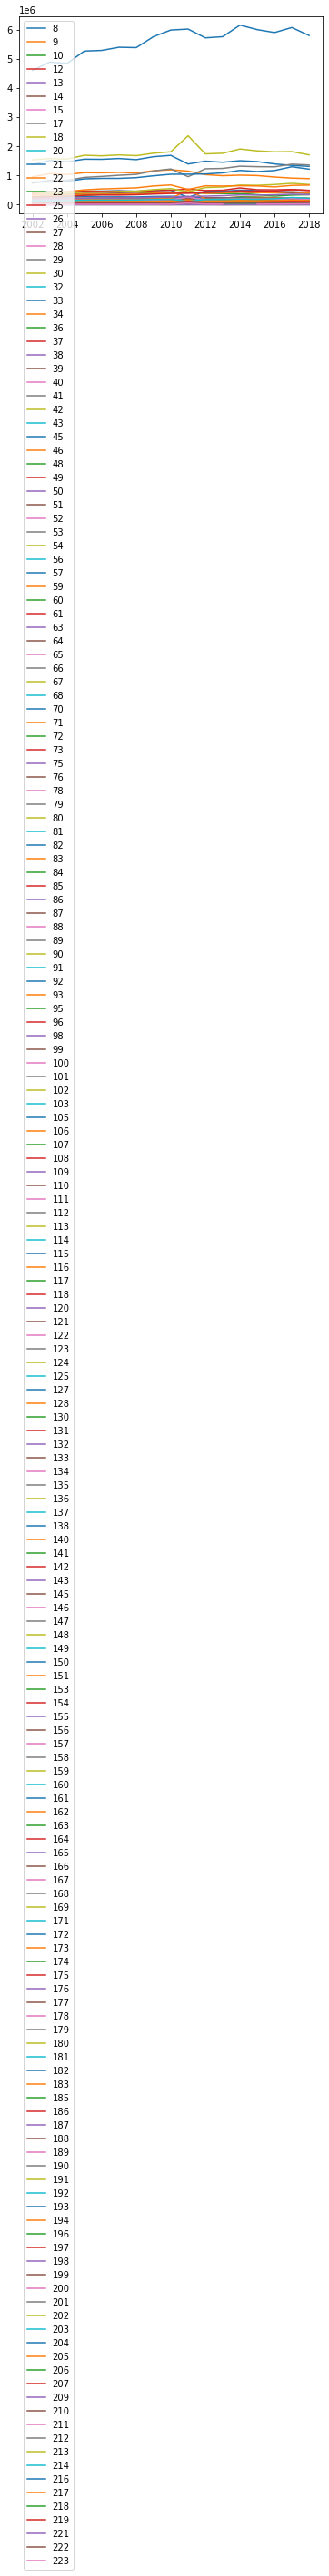

In [186]:
a.T.plot()

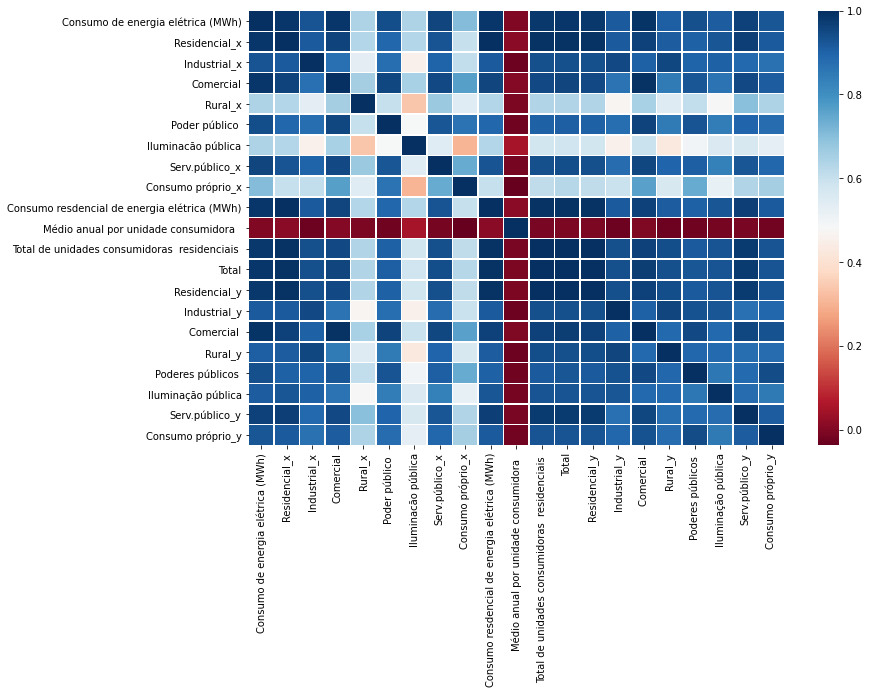

In [1221]:
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)
sns.heatmap(energy.iloc[:, 2:].astype(float).corr(), cmap='RdBu', linewidths=0.5, ax=ax0)